In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
genes=['gene'+str(i) for i in range (1,101)]
wt=['wt'+str(i) for i in range (1,6)]
ko=['ko'+str(i) for i in range (1,6)]

In [3]:
data=pd.DataFrame(columns=[*wt,*ko],index=genes)

In [4]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [5]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,604,612,608,625,640,687,658,723,685,642
gene2,305,313,320,293,338,133,115,130,122,139
gene3,419,459,390,432,409,817,818,823,850,754
gene4,276,303,303,286,305,689,664,729,704,714
gene5,500,461,472,498,477,282,294,281,279,284


In [6]:
data.shape

(100, 10)

In [7]:
scaled_data=StandardScaler().fit_transform(data.T)

In [8]:
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [9]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range (1,len(per_var)+1)]

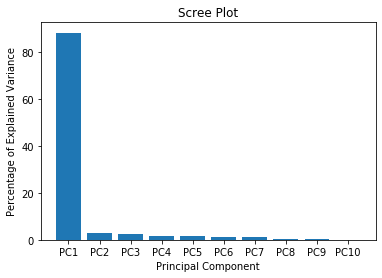

In [10]:
# Scree plot
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

In [11]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.734085,0.749186,1.339231,2.319141,-2.035655,-0.247609,-0.616067,0.375957,-0.543025,6.661338e-16
wt2,-9.158774,-1.509076,0.118535,-1.828563,-2.045016,-0.018905,1.209772,-0.030996,0.735580,6.938894e-16
wt3,-9.335521,2.367738,-1.215644,-0.040028,1.317823,0.039317,-0.657404,0.796739,1.038441,2.248202e-15
wt4,-9.470725,-1.616106,0.922021,0.463201,2.338493,-1.499188,0.921237,-0.181294,-0.410241,-1.915135e-15
wt5,-9.283628,0.061721,-1.167845,-1.059874,0.425529,1.715307,-0.841271,-0.954022,-0.827425,1.110223e-15
ko1,9.342862,-2.174089,-1.265863,0.115385,0.221505,0.940823,0.124292,1.461239,-0.472047,-9.436896e-16
ko2,9.845044,2.890852,0.115107,-1.718889,-0.395228,-1.135028,0.601070,0.156860,-0.789104,1.387779e-15
ko3,9.127450,0.953268,-0.715823,1.994032,0.131010,1.008002,1.648301,-0.780879,0.407355,6.661338e-16
ko4,9.412082,-0.351508,3.703709,-0.592262,0.615347,0.783540,-0.914391,-0.135854,0.483435,-3.608225e-16
ko5,9.255296,-1.371986,-1.833427,0.347857,-0.573809,-1.586258,-1.475538,-0.707750,0.377032,5.551115e-17


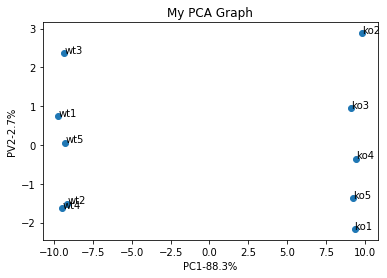

In [12]:
# scatter plot
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PV2-{0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

In [13]:
loading_scores=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

In [14]:
top_10_genes=sorted_loading_scores[0:10].index.values
loading_scores[top_10_genes]

gene22    0.106295
gene50    0.106291
gene27   -0.106287
gene19    0.106284
gene25   -0.106284
gene14    0.106281
gene81   -0.106276
gene36    0.106269
gene58    0.106265
gene54    0.106262
dtype: float64